In [2]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import dask.dataframe as dd
from dask.distributed import Client
from dask.diagnostics import ProgressBar
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model

In [3]:
c = Client()
c

Client Scheduler: tcp://127.0.0.1:39482 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 34.36 GB


In [4]:
def parse(f):
    for l in gzip.open(f):
        yield eval(l)

In [5]:
filepath = 'dataset/'

In [5]:
files = [f for f in listdir(filepath) if isfile(join(filepath, f))]
files

['mousewait.csv000.gz',
 'hw_metric_histo.csv001.gz',
 'plist_process_resource_util_13wks.csv001.gz',
 'plist_process_resource_util_13wks.csv000.gz',
 'hw_metric_histo.csv000.gz',
 'frgnd_v2.csv000.gz',
 'frgnd_backgrnd_apps.csv000.gz',
 'plist_process_resource_util_hist.csv001.gz',
 'plist_process_resource_util_hist.csv003.gz',
 'plist_process_resource_util_hist.csv002.gz',
 'devuse_4known_device.csv001.gz',
 'system_sysinfo_unique_normalized.csv000.gz',
 'mousewait_all.csv001.gz',
 'batt_acdc_events.csv000.gz',
 'devuse_4known_device.csv000.gz',
 'batt_info.csv000.gz']

## Plist

In [6]:
plist_hist_path = filepath + 'plist_process_resource_util_hist.csv001.gz'
plist_hist = pd.read_csv(plist_hist_path, nrows=3000000, compression='gzip', sep='\t')
plist_hist.head()

,load_ts,batch_id,audit_zip,audit_internal_path,guid,interval_start_utc,interval_end_utc,interval_local_start,interval_local_end,ts,...,page_faults,hard_page_faults,disk_read_iobytes,disk_write_iobytes,tcpip_sendbytes,tcpip_receivebytes,udpip_sendbytes,udpip_receivebytes,avg_memory,peak_memory
0,2019-10-27 04:18:53,20191026-210555,2019102613-i-0728cf8ab79db9e58-BWQBS6dNb6kotNg...,V8PLIST_20191026164535.V8,189edb26714340028140631a83a09147,2019-10-25 13:43:43,2019-10-26 13:45:52,2019-10-25 16:43:43,2019-10-26 16:45:52,2019-10-25 16:45:43,...,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-10-26 04:08:28,20191025-210226,2019102520-i-04a9a906e1cd5620c-kJTLQLoksOPH6dx...,V8PLIST_20191025220758.V8,1a5db163364841b58ee19fb2fa567c45,2019-10-24 20:07:46,2019-10-25 20:08:15,2019-10-24 22:07:46,2019-10-25 22:08:15,2019-10-25 00:02:18,...,4640.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,2987.5,8312.0
2,2019-10-26 04:08:28,20191025-210226,2019102520-i-04a9a906e1cd5620c-kJTLQLoksOPH6dx...,V8PLIST_20191025220758.V8,1a5db163364841b58ee19fb2fa567c45,2019-10-24 20:07:46,2019-10-25 20:08:15,2019-10-24 22:07:46,2019-10-25 22:08:15,2019-10-25 22:08:09,...,15475.0,5.0,96256.0,0.0,0.0,0.0,0.0,0.0,27927.0,31660.0
3,2019-10-26 04:08:28,20191025-210226,2019102520-i-04a9a906e1cd5620c-kJTLQLoksOPH6dx...,V8PLIST_20191025220758.V8,1a5db163364841b58ee19fb2fa567c45,2019-10-24 20:07:46,2019-10-25 20:08:15,2019-10-24 22:07:46,2019-10-25 22:08:15,2019-10-25 12:26:00,...,11751.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,27859.0,32628.0
4,2019-10-26 04:08:28,20191025-210226,2019102520-i-04a9a906e1cd5620c-kJTLQLoksOPH6dx...,V8PLIST_20191025220758.V8,1a5db163364841b58ee19fb2fa567c45,2019-10-24 20:07:46,2019-10-25 20:08:15,2019-10-24 22:07:46,2019-10-25 22:08:15,2019-10-25 00:02:18,...,6204.0,55.0,225792.0,0.0,0.0,0.0,0.0,0.0,10298.0,29216.0


In [48]:
plist_hist.columns

Index(['load_ts', 'batch_id', 'audit_zip', 'audit_internal_path', 'guid',
       'interval_start_utc', 'interval_end_utc', 'interval_local_start',
       'interval_local_end', 'ts', 'start_dt', 'proc_name', 'exe_hash',
       'num_runs', 'ttl_run_tm_in_ms', 'cpu_user_sec', 'cpu_kernel_sec',
       'io_bytes_read', 'io_bytes_write', 'io_bytes_other', 'page_faults',
       'hard_page_faults', 'disk_read_iobytes', 'disk_write_iobytes',
       'tcpip_sendbytes', 'tcpip_receivebytes', 'udpip_sendbytes',
       'udpip_receivebytes', 'avg_memory', 'peak_memory'],
      dtype='object')

In [49]:
plist_hist['key'] = plist_hist['guid'] + ' '+plist_hist['batch_id']

In [50]:
plist_hist.groupby('key').sum()

,num_runs,ttl_run_tm_in_ms,cpu_user_sec,cpu_kernel_sec,io_bytes_read,io_bytes_write,io_bytes_other,page_faults,hard_page_faults,disk_read_iobytes,disk_write_iobytes,tcpip_sendbytes,tcpip_receivebytes,udpip_sendbytes,udpip_receivebytes,avg_memory,peak_memory
key,,,,,,,,,,,,,,,,,
000014861c7148f0ad23307a0f38e868 20191025-210226,59,92415354,8131.000000,100.000000,5.953763e+07,1.912498e+07,3.935052e+07,506627.0,93921.0,4.273715e+07,2.476902e+07,173435.0,9.782180e+05,25583.0,1.301670e+05,5.085550e+05,683548.0
000014861c7148f0ad23307a0f38e868 20191030-210210,1063,155415714,59.766008,69.375491,1.788668e+09,2.526969e+08,1.310235e+10,4904025.0,64464.0,1.339497e+09,1.237970e+08,4446058.0,5.917869e+07,37235.0,5.227390e+05,1.279122e+06,2869528.0
00001b53d8c64a4ba0a6c3c0c42f5fae 20191026-210555,4771,6394033778,284185.812131,10309.000000,2.527839e+10,1.302647e+10,4.531236e+10,109225238.0,275294.0,5.083740e+10,4.930866e+10,77001229.0,2.875356e+09,44085092.0,1.262052e+09,1.873541e+06,7328484.0
000080d2f98b4f248bb4bffd829527be 20191017-210225,594,8108321986,900.296763,1133.765547,1.913409e+10,9.920215e+08,1.892090e+09,19915676.0,102144.0,5.209816e+10,4.918378e+10,11989060.0,5.741624e+06,329275.0,6.722271e+06,4.851928e+05,1552012.0
000080d2f98b4f248bb4bffd829527be 20191018-210223,435,6509934747,700.968563,359.406155,1.178683e+10,4.022747e+08,8.616553e+08,5458183.0,39787.0,1.251174e+09,7.630541e+07,10042015.0,5.812822e+06,395136.0,7.545433e+06,1.001043e+04,212700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb0425bd12c4d0aabb3ee2fd83006ee 20191021-210443,951,7707366219,444.000000,576.719040,3.085688e+09,1.223193e+09,7.870492e+08,27517042.0,13762.0,4.858726e+08,1.750948e+08,34200286.0,3.279789e+07,2912070.0,1.456847e+07,8.096474e+05,1839916.0
ffd6d258ec5f47c3b56eb7fe80c736ed 20191018-210223,338,262222767,5479.000000,379.000000,1.799284e+09,6.888509e+08,2.113242e+10,5380844.0,85640.0,1.362546e+09,2.353725e+08,2263845.0,1.369517e+07,186598.0,1.845165e+06,4.226748e+06,7189116.0
ffd6d258ec5f47c3b56eb7fe80c736ed 20191022-210226,550,143652131,64.000000,114.500053,2.653495e+09,1.095111e+09,8.833961e+09,6911255.0,156719.0,3.216524e+09,3.917486e+08,1821592.0,6.980016e+07,1089038.0,2.652806e+07,3.961407e+06,6510296.0


## Wait

In [7]:
wait_path = filepath + 'mousewait.csv000.gz'
wait = pd.read_csv(wait_path, nrows=500000, compression='gzip', sep='\t')
wait.head()

,load_ts,batch_id,audit_zip,audit_internal_path,guid,interval_start_utc,interval_end_utc,interval_local_start,interval_local_end,ts,dt,wait_msecs
0,2019-10-16 04:14:10,20191015-210431,2019101508-i-04a9a906e1cd5620c-mwKSBh69JN7Be4d...,V8WAIT_20191014093021.V8,000191350c96450d9a3abe474651ca64,2019-10-12 08:04:27,2019-10-14 08:30:35,2019-10-12 09:04:27,2019-10-14 09:30:35,2019-10-12 14:05:49,2019-10-12,1200
1,2019-10-16 04:14:10,20191015-210431,2019101508-i-04a9a906e1cd5620c-39jBWoAs1p6xBP9...,V8WAIT_20191015093025.V8,000191350c96450d9a3abe474651ca64,2019-10-14 08:31:01,2019-10-15 08:30:52,2019-10-14 09:31:01,2019-10-15 09:30:52,2019-10-14 15:15:47,2019-10-14,2401
2,2019-10-16 04:14:10,20191015-210431,2019101508-i-04a9a906e1cd5620c-39jBWoAs1p6xBP9...,V8WAIT_20191015093025.V8,000191350c96450d9a3abe474651ca64,2019-10-14 08:31:01,2019-10-15 08:30:52,2019-10-14 09:31:01,2019-10-15 09:30:52,2019-10-14 17:15:38,2019-10-14,5000
3,2019-10-16 04:14:10,20191015-210431,2019101508-i-04a9a906e1cd5620c-39jBWoAs1p6xBP9...,V8WAIT_20191015093025.V8,000191350c96450d9a3abe474651ca64,2019-10-14 08:31:01,2019-10-15 08:30:52,2019-10-14 09:31:01,2019-10-15 09:30:52,2019-10-14 17:19:44,2019-10-14,2000
4,2019-10-16 04:14:10,20191015-210431,2019101508-i-04a9a906e1cd5620c-39jBWoAs1p6xBP9...,V8WAIT_20191015093025.V8,000191350c96450d9a3abe474651ca64,2019-10-14 08:31:01,2019-10-15 08:30:52,2019-10-14 09:31:01,2019-10-15 09:30:52,2019-10-14 17:19:46,2019-10-14,3300


## Combine

In [43]:
plist_guids = plist_hist['guid'].value_counts().index
print('plist_guids: '+ str(len(plist_guids)))

plist_guids: 14539


In [9]:
wait_guids = wait['guid'].value_counts().index
len(wait_guids)

1175

In [10]:
common_guid = list(set(plist_hist['guid'].value_counts().index) & set(wait['guid'].value_counts().index))
len(common_guid)

100

In [44]:
print('plist_guids: '+ str(len(plist_guids)))
print('wait_guids: '+ str(len(wait_guids)))
print('common_guids: '+ str(len(common_guid)))

plist_guids: 14539
wait_guids: 1175
common_guids: 100


In [46]:
print('common_keys: '+ '80')

common_keys: 80


In [11]:
plist_user_one = plist_hist[plist_hist['guid'] == common_guid[0]]
plist_user_one.head().transpose()

,2081111,2081112,2081113,2081114,2081115
load_ts,2019-11-03 07:32:36,2019-11-03 07:32:36,2019-11-02 04:07:49,2019-11-03 07:32:36,2019-11-02 04:07:49
batch_id,20191102-210224,20191102-210224,20191101-210226,20191102-210224,20191101-210226
audit_zip,2019110217-i-040171543e1bfef37-BmiZKQACF4095Dd...,2019110217-i-040171543e1bfef37-BmiZKQACF4095Dd...,2019110117-i-0728cf8ab79db9e58-NXuGO6LXCDIZQu7...,2019110217-i-040171543e1bfef37-BmiZKQACF4095Dd...,2019110117-i-0728cf8ab79db9e58-NXuGO6LXCDIZQu7...
audit_internal_path,V8PLIST_20191102203612.V8,V8PLIST_20191102203612.V8,V8PLIST_20191101203601.V8,V8PLIST_20191102203612.V8,V8PLIST_20191101203601.V8
guid,0006a4e301544f9a801c4b28eb25421b,0006a4e301544f9a801c4b28eb25421b,0006a4e301544f9a801c4b28eb25421b,0006a4e301544f9a801c4b28eb25421b,0006a4e301544f9a801c4b28eb25421b
interval_start_utc,2019-11-01 17:36:09,2019-11-01 17:36:09,2019-10-31 11:43:05,2019-11-01 17:36:09,2019-10-31 11:43:05
interval_end_utc,2019-11-02 17:36:25,2019-11-02 17:36:25,2019-11-01 17:36:11,2019-11-02 17:36:25,2019-11-01 17:36:11
interval_local_start,2019-11-01 20:36:09,2019-11-01 20:36:09,2019-10-31 14:43:05,2019-11-01 20:36:09,2019-10-31 14:43:05
interval_local_end,2019-11-02 20:36:25,2019-11-02 20:36:25,2019-11-01 20:36:11,2019-11-02 20:36:25,2019-11-01 20:36:11
ts,2019-11-01 23:58:38,2019-11-01 22:01:53,2019-11-01 04:40:52,2019-11-01 23:03:57,2019-11-01 20:36:06


In [12]:
wait_user_one = wait[wait['guid'] == common_guid[0]]
wait_user_one.head()

,load_ts,batch_id,audit_zip,audit_internal_path,guid,interval_start_utc,interval_end_utc,interval_local_start,interval_local_end,ts,dt,wait_msecs
439664,2019-10-11 04:08:57,20191010-210225,2019101004-i-04a9a906e1cd5620c-s7xAwI1S3IahJTy...,V8WAIT_20191010071001.V8,0006a4e301544f9a801c4b28eb25421b,2019-10-09 04:08:26,2019-10-10 04:10:11,2019-10-09 07:08:26,2019-10-10 07:10:11,2019-10-09 14:10:41,2019-10-09,4600
439665,2019-10-11 04:08:57,20191010-210225,2019101004-i-04a9a906e1cd5620c-s7xAwI1S3IahJTy...,V8WAIT_20191010071001.V8,0006a4e301544f9a801c4b28eb25421b,2019-10-09 04:08:26,2019-10-10 04:10:11,2019-10-09 07:08:26,2019-10-10 07:10:11,2019-10-09 21:12:05,2019-10-09,1599
439666,2019-10-11 04:08:57,20191010-210225,2019101004-i-04a9a906e1cd5620c-s7xAwI1S3IahJTy...,V8WAIT_20191010071001.V8,0006a4e301544f9a801c4b28eb25421b,2019-10-09 04:08:26,2019-10-10 04:10:11,2019-10-09 07:08:26,2019-10-10 07:10:11,2019-10-10 00:30:31,2019-10-10,1701
439667,2019-10-12 04:08:44,20191011-210226,2019101104-i-040171543e1bfef37-9tSl6ir8o5uN01A...,V8WAIT_20191011073207.V8,0006a4e301544f9a801c4b28eb25421b,2019-10-10 04:10:09,2019-10-11 04:32:18,2019-10-10 07:10:09,2019-10-11 07:32:18,2019-10-11 01:34:23,2019-10-11,1200
439668,2019-10-12 04:08:44,20191011-210226,2019101104-i-040171543e1bfef37-9tSl6ir8o5uN01A...,V8WAIT_20191011073207.V8,0006a4e301544f9a801c4b28eb25421b,2019-10-10 04:10:09,2019-10-11 04:32:18,2019-10-10 07:10:09,2019-10-11 07:32:18,2019-10-11 01:50:09,2019-10-11,1900


In [13]:
temp = pd.to_datetime(wait_user_one['interval_end_utc']) - pd.to_datetime(wait_user_one['interval_start_utc'])

In [14]:
temp.apply(lambda x: x.seconds).value_counts()

154      13
214      11
18778     7
78        7
5698      7
712       6
16        5
11019     4
13        4
12886     4
5777      4
4477      4
444       3
3745      3
12466     3
105       3
50        2
1329      2
3756      2
30        2
12101     2
71        2
23        2
52544     1
21186     1
29        1
5448      1
107       1
13303     1
33535     1
dtype: int64

## Feature Process

In [15]:
plist_hist['common'] = plist_hist['guid'].apply(lambda x: x in common_guid)
plist_hist_common = plist_hist[plist_hist['common']]

In [16]:
wait['common'] = wait['guid'].apply(lambda x: x in common_guid)
wait_common = wait[wait['common']]

In [17]:
plist_hist_common['key'] = plist_hist_common['guid'] + plist_hist_common['batch_id']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
wait_common['key'] = wait_common['guid'] + wait_common['batch_id']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
wait_common = wait_common[['key', 'wait_msecs']]

In [20]:
merged_df = pd.merge(plist_hist_common, wait_common, on = 'key')

In [21]:
pro_df = merged_df.groupby('key').sum()

In [22]:
#pro_df = pro_df.apply(lambda x: x / pro_df['ttl_run_tm_in_ms'])

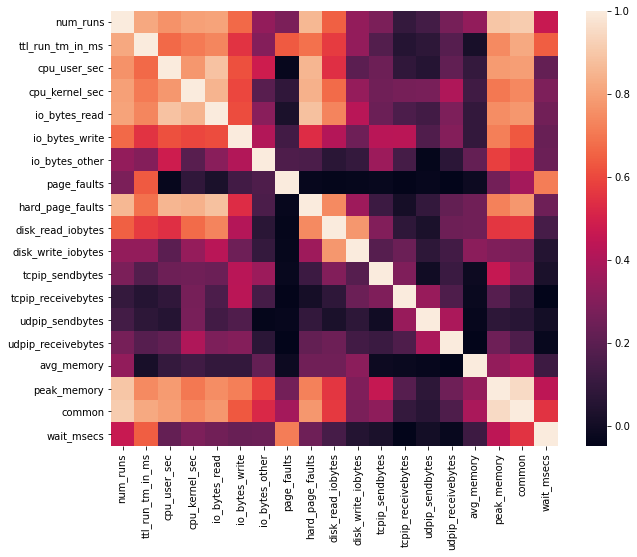

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(pro_df.corr())

In [26]:
cor = pro_df.corr()['wait_msecs']
cor[cor > 0.4].drop(['common', 'wait_msecs'])

num_runs            0.464598
ttl_run_tm_in_ms    0.647657
page_faults         0.716664
peak_memory         0.441339
Name: wait_msecs, dtype: float64

Text(0.5, 0, 'log of num runs')

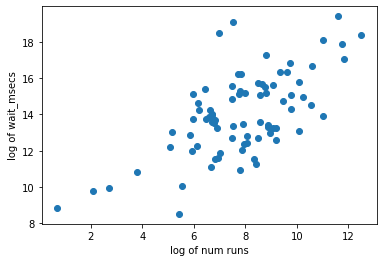

In [36]:
plt.scatter(np.log(pro_df['num_runs']),np.log(pro_df['wait_msecs']),)
plt.ylabel("log of wait_msecs",fontsize=10)
plt.xlabel("log of num runs",fontsize=10)

In [34]:
reg = linear_model.LinearRegression()
reg.fit(np.log(pro_df['num_runs'], np.log(pro_df['wait_msecs'])))

RecursionError: maximum recursion depth exceeded

Text(0.5, 0, 'log of ttl_run_tm_in_ms')

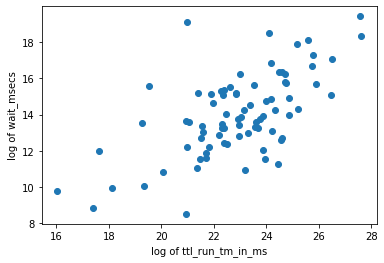

In [39]:
plt.scatter(np.log(pro_df['ttl_run_tm_in_ms']),np.log(pro_df['wait_msecs']))
plt.ylabel("log of wait_msecs",fontsize=10)
plt.xlabel("log of ttl_run_tm_in_ms",fontsize=10)

Text(0.5, 0, 'log of page_faults')

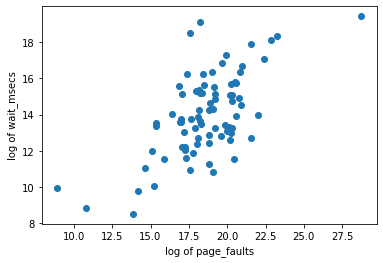

In [40]:
plt.scatter(np.log(pro_df['page_faults']),np.log(pro_df['wait_msecs']))
plt.ylabel("log of wait_msecs",fontsize=10)
plt.xlabel('log of page_faults',fontsize=10)

Text(0.5, 0, 'log of peak_memory')

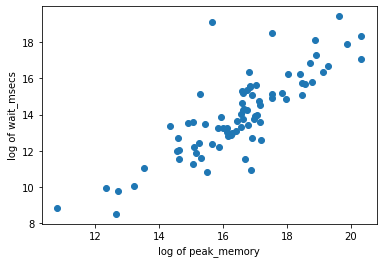

In [41]:
plt.scatter(np.log(pro_df['peak_memory']),np.log(pro_df['wait_msecs']))
plt.ylabel("log of wait_msecs",fontsize=10)
plt.xlabel('log of peak_memory',fontsize=10)

In [ ]:
with ProgressBar():
    a = df.compute()
a

## All

In [10]:
wait_all_path = filepath + 'mousewait_all.csv001.gz'
wait_all = pd.read_csv(wait_all_path, nrows=500000, compression='gzip',sep = '\x01', error_bad_lines = False)
wait_all.head()

,load_ts,batch_id,audit_zip,audit_internal_path,guid,interval_start_utc,interval_end_utc,interval_local_start,interval_local_end,ts,...,after_cpuutil_max,after_harddpf_mean,after_harddpf_min,after_harddpf_max,after_diskutil_mean,after_diskutil_min,after_diskutil_max,after_networkutil_mean,after_networkutil_min,after_networkutil_max
0,2020-02-17 04:14:15,20200216-200527,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,V8WAIT_20200215225003.V8,ec601c5d312847a68f2346944dbf7433,2020-02-14 15:49:11,2020-02-15 15:51:30,2020-02-14 22:49:11,2020-02-15 22:51:30,2020-02-14 23:06:07,...,63.653845,32975.522486,14414.729578,109379.546298,6.996697e+06,4.424675e+06,1.669766e+07,160113.666050,10555.214421,7.005273e+05
1,2020-02-17 04:14:15,20200216-200527,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,V8WAIT_20200215225003.V8,ec601c5d312847a68f2346944dbf7433,2020-02-14 15:49:11,2020-02-15 15:51:30,2020-02-14 22:49:11,2020-02-15 22:51:30,2020-02-14 23:36:14,...,52.734400,23418.144640,1118.973930,78629.416961,1.603042e+06,1.966386e+04,8.046177e+06,10087.796235,2286.012122,1.363990e+04
2,2020-02-17 04:14:15,20200216-200527,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,V8WAIT_20200215225003.V8,ec601c5d312847a68f2346944dbf7433,2020-02-14 15:49:11,2020-02-15 15:51:30,2020-02-14 22:49:11,2020-02-15 22:51:30,2020-02-15 00:17:33,...,58.965876,23912.363263,1737.067429,116903.898039,2.141939e+06,3.277305e+04,9.064737e+06,12314.223147,8185.584133,2.340836e+04
3,2020-02-17 04:14:15,20200216-200527,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,V8WAIT_20200215225003.V8,ec601c5d312847a68f2346944dbf7433,2020-02-14 15:49:11,2020-02-15 15:51:30,2020-02-14 22:49:11,2020-02-15 22:51:30,2020-02-15 00:53:26,...,34.951303,21957.671636,530.575343,113020.664224,1.552810e+06,3.153773e+04,6.460560e+06,8264.801956,2176.351066,1.344384e+04
4,2020-02-17 04:14:15,20200216-200527,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,V8WAIT_20200215225003.V8,ec601c5d312847a68f2346944dbf7433,2020-02-14 15:49:11,2020-02-15 15:51:30,2020-02-14 22:49:11,2020-02-15 22:51:30,2020-02-15 21:02:01,...,64.355809,46216.966367,22111.284672,110219.798541,6.959890e+06,2.837489e+06,1.672723e+07,474115.187358,22557.075868,2.653365e+06


In [72]:
subset_wait_all = wait_all.head(1000)

In [32]:
subset_wait_all.transpose()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
load_ts,2020-02-17 04:14:15,2020-02-17 04:14:15,2020-02-17 04:14:15,2020-02-17 04:14:15,2020-02-17 04:14:15,2020-02-17 04:14:15,2020-02-17 04:14:15,2020-02-17 04:14:15,2020-02-17 04:14:15,2020-02-17 04:14:15,...,2020-11-28 03:11:24,2020-11-28 03:11:24,2020-11-28 03:11:24,2020-11-28 03:11:24,2020-11-28 03:11:24,2020-11-28 03:11:24,2020-11-28 03:11:24,2020-11-28 03:11:24,2020-11-28 03:11:24,2020-11-28 03:11:24
batch_id,20200216-200527,20200216-200527,20200216-200527,20200216-200527,20200216-200527,20200216-200527,20200216-200527,20200216-200527,20200216-200527,20200216-200527,...,20201127-190229,20201127-190229,20201127-190229,20201127-190229,20201127-190229,20201127-190229,20201127-190229,20201127-190229,20201127-190229,20201127-190229
audit_zip,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,2020021615-i-04a9a906e1cd5620c-YNVr6Q1BYXuv83g...,2020021615-i-04a9a906e1cd5620c-YNVr6Q1BYXuv83g...,2020021615-i-04a9a906e1cd5620c-YNVr6Q1BYXuv83g...,...,2020112708-i-04a9a906e1cd5620c-kVfiEtI9iDkHUdx...,2020112708-i-04a9a906e1cd5620c-kVfiEtI9iDkHUdx...,2020112708-i-04a9a906e1cd5620c-kVfiEtI9iDkHUdx...,2020112708-i-04a9a906e1cd5620c-kVfiEtI9iDkHUdx...,2020112708-i-04a9a906e1cd5620c-kVfiEtI9iDkHUdx...,2020112708-i-04a9a906e1cd5620c-kVfiEtI9iDkHUdx...,2020112708-i-04a9a906e1cd5620c-kVfiEtI9iDkHUdx...,2020112708-i-04a9a906e1cd5620c-kVfiEtI9iDkHUdx...,2020112708-i-04a9a906e1cd5620c-kVfiEtI9iDkHUdx...,2020112708-i-04a9a906e1cd5620c-kVfiEtI9iDkHUdx...
audit_internal_path,V8WAIT_20200215225003.V8,V8WAIT_20200215225003.V8,V8WAIT_20200215225003.V8,V8WAIT_20200215225003.V8,V8WAIT_20200215225003.V8,V8WAIT_20200215225003.V8,V8WAIT_20200215225003.V8,V8WAIT_20200216225134.V8,V8WAIT_20200216225134.V8,V8WAIT_20200216225134.V8,...,V8WAIT_20201127094151.V8,V8WAIT_20201127094151.V8,V8WAIT_20201127094151.V8,V8WAIT_20201127094151.V8,V8WAIT_20201127094151.V8,V8WAIT_20201127094151.V8,V8WAIT_20201127094151.V8,V8WAIT_20201127094151.V8,V8WAIT_20201127094151.V8,V8WAIT_20201127094151.V8
guid,ec601c5d312847a68f2346944dbf7433,ec601c5d312847a68f2346944dbf7433,ec601c5d312847a68f2346944dbf7433,ec601c5d312847a68f2346944dbf7433,ec601c5d312847a68f2346944dbf7433,ec601c5d312847a68f2346944dbf7433,ec601c5d312847a68f2346944dbf7433,ec601c5d312847a68f2346944dbf7433,ec601c5d312847a68f2346944dbf7433,ec601c5d312847a68f2346944dbf7433,...,c75cd100df78461cb063072f158dbacb,c75cd100df78461cb063072f158dbacb,c75cd100df78461cb063072f158dbacb,c75cd100df78461cb063072f158dbacb,c75cd100df78461cb063072f158dbacb,c75cd100df78461cb063072f158dbacb,c75cd100df78461cb063072f158dbacb,c75cd100df78461cb063072f158dbacb,c75cd100df78461cb063072f158dbacb,c75cd100df78461cb063072f158dbacb
interval_start_utc,2020-02-14 15:49:11,2020-02-14 15:49:11,2020-02-14 15:49:11,2020-02-14 15:49:11,2020-02-14 15:49:11,2020-02-14 15:49:11,2020-02-14 15:49:11,2020-02-15 15:51:29,2020-02-15 15:51:29,2020-02-15 15:51:29,...,2020-11-26 08:40:34,2020-11-26 08:40:34,2020-11-26 08:40:34,2020-11-26 08:40:34,2020-11-26 08:40:34,2020-11-26 08:40:34,2020-11-26 08:40:34,2020-11-26 08:40:34,2020-11-26 08:40:34,2020-11-26 08:40:34
interval_end_utc,2020-02-15 15:51:30,2020-02-15 15:51:30,2020-02-15 15:51:30,2020-02-15 15:51:30,2020-02-15 15:51:30,2020-02-15 15:51:30,2020-02-15 15:51:30,2020-02-16 15:52:46,2020-02-16 15:52:46,2020-02-16 15:52:46,...,2020-11-27 08:42:06,2020-11-27 08:42:06,2020-11-27 08:42:06,2020-11-27 08:42:06,2020-11-27 08:42:06,2020-11-27 08:42:06,2020-11-27 08:42:06,2020-11-27 08:42:06,2020-11-27 08:42:06,2020-11-27 08:42:06
interval_local_start,2020-02-14 22:49:11,2020-02-14 22:49:11,2020-02-14 22:49:11,2020-02-14 22:49:11,2020-02-14 22:49:11,2020-02-14 22:49:1

(array([999.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00100000e+03, 2.78535760e+06, 5.56971420e+06, 8.35407080e+06,
        1.11384274e+07, 1.39227840e+07, 1.67071406e+07, 1.94914972e+07,
        2.22758538e+07, 2.50602104e+07, 2.78445670e+07]),
 <a list of 10 Patch objects>)

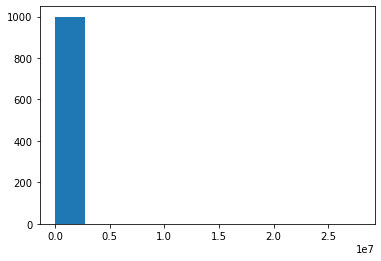

In [76]:
plt.hist(subset_wait_all.wait_msecs)

In [84]:
subset_wait_all.wait_msecs.value_counts(bins = 10)

(-26842.567, 2785357.6]     999
(25060210.4, 27844567.0]      1
(22275853.8, 25060210.4]      0
(19491497.2, 22275853.8]      0
(16707140.6, 19491497.2]      0
(13922784.0, 16707140.6]      0
(11138427.4, 13922784.0]      0
(8354070.8, 11138427.4]       0
(5569714.2, 8354070.8]        0
(2785357.6, 5569714.2]        0
Name: wait_msecs, dtype: int64

In [91]:
cpu_util_threshold = 100
wait_threshold = 1E4
subset_one = subset_wait_all[['before_cpuutil_max', 'wait_msecs', 'before_harddpf_max', 'before_diskutil_max', 'before_networkutil_max']]
subset_one = subset_one[subset_one.before_cpuutil_max < cpu_util_threshold]
subset_one = subset_one[subset_one.wait_msecs < wait_threshold]
subset_one['before_harddpf_max'] = np.log(subset_one['before_harddpf_max'])
subset_one['before_diskutil_max'] = np.log(subset_one['before_diskutil_max'])
subset_one['before_networkutil_max'] = np.log(subset_one['before_networkutil_max'])

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [92]:
subset_one.wait_msecs.value_counts(bins = 10)

(992.202, 1880.7]    428
(3640.1, 4519.8]     153
(2760.4, 3640.1]     141
(5399.5, 6279.2]      68
(6279.2, 7158.9]      47
(4519.8, 5399.5]      45
(1880.7, 2760.4]      41
(8038.6, 8918.3]      23
(8918.3, 9798.0]      10
(7158.9, 8038.6]      10
Name: wait_msecs, dtype: int64

In [93]:
subset_one.wait_msecs.value_counts(bins = 10).sum()

966

(array([428.,  41., 141., 153.,  45.,  68.,  47.,  10.,  23.,  10.]),
 array([1001. , 1880.7, 2760.4, 3640.1, 4519.8, 5399.5, 6279.2, 7158.9,
        8038.6, 8918.3, 9798. ]),
 <a list of 10 Patch objects>)

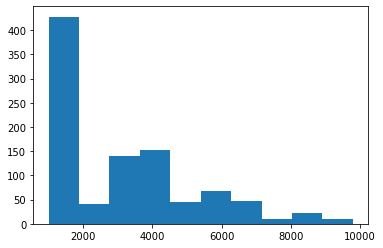

In [94]:
plt.hist(subset_one.wait_msecs)

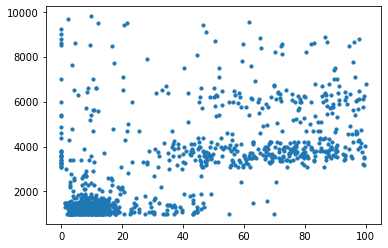

In [70]:
plt.scatter(subset_one.before_cpuutil_max, subset_one.wait_msecs, s = 10)

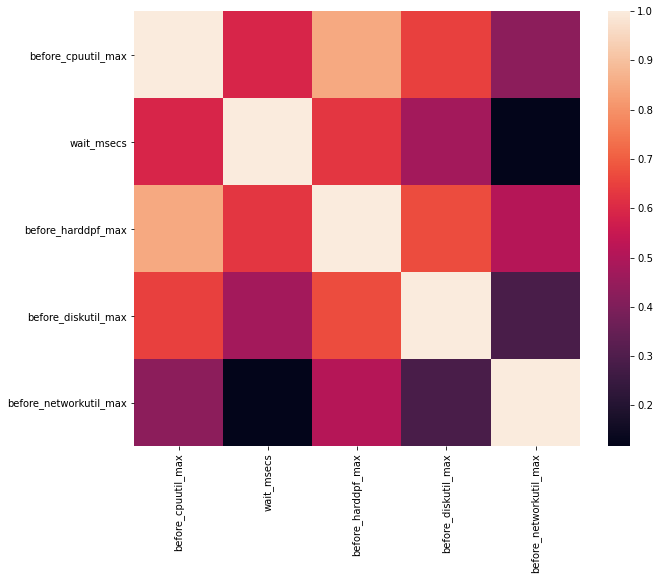

In [69]:
plt.figure(figsize=(10, 8))
sns.heatmap(subset_one.corr())

In [97]:
subset_one = subset_one.drop('before_networkutil_max', axis = 1)

In [100]:
subset_one.replace({-inf:0})

NameError: name 'inf' is not defined

ValueError: supplied range of [-inf, 13.145784652011033] is not finite

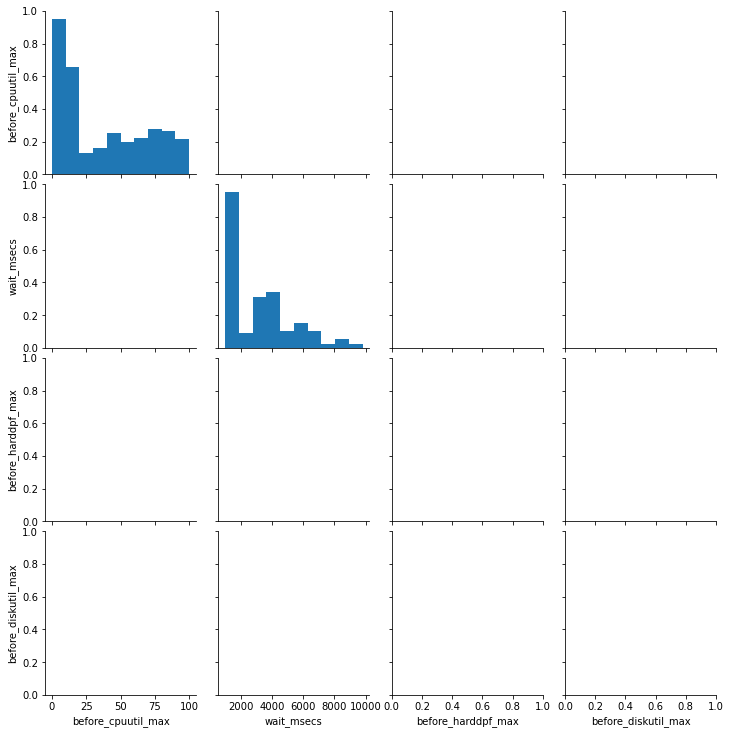

In [99]:
sns.pairplot(subset_one)